In [1]:
import sys
sys.path.append('../libs')  # Update this path according to the location of your 'dataset' module
import dataset
import preprocessing
import classes
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.preprocessing import RobustScaler
from sklearn import svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [2]:
# Chosen Hyper Params

pca_components = 10
svm_cost = 1
svm_kernel = "poly"
scaler_q_min = 25
scaler_q_max = 75

In [3]:
X = dataset.data()
y = np.array(list(map(classes.label_to_class, dataset.labels_array())))

X = X
y = y

X_train, X_test_validation, y_train, y_test_validation = train_test_split(X, y, test_size=0.25, random_state=42)

X_test, X_validation, y_test, y_validation = train_test_split(X_test_validation, y_test_validation, test_size=0.25, random_state=999)

(samples, features, frames) = X_train.shape


In [4]:

scaler = RobustScaler(quantile_range=(scaler_q_min, scaler_q_max))
X_transposed = X_train.transpose(0,2,1)
arr = np.reshape(X_transposed, (samples * frames, features))
scaled = scaler.fit_transform(arr)

pca = PCA(n_components=pca_components)
reduced_X = pca.fit(scaled)

In [5]:
flat_X = np.empty((samples, frames, pca_components))

for i in range(samples):
    flat_X[i] = pca.transform(scaler.transform(X_transposed[i]))

flat_X = np.reshape(flat_X, (samples, frames * pca_components))
print(flat_X.shape)

(33972, 440)


In [6]:
clf = svm.SVC(cache_size=1000, verbose=True, class_weight='balanced', C = svm_cost, kernel=svm_kernel)
clf.fit(flat_X, y_train)

[LibSVM]........*..*
optimization finished, #iter = 9178
obj = -1326.220995, rho = -0.929066
nSV = 6627, nBSV = 5496
............
*.
*
optimization finished, #iter = 13166
obj = -2045.325418, rho = -0.950769
nSV = 9439, nBSV = 8134
...........*.
*.*
optimization finished, #iter = 12703
obj = -2126.708831, rho = -0.816642
nSV = 9825, nBSV = 8454
............
*..*
optimization finished, #iter = 14352
obj = -2238.954381, rho = -0.885518
nSV = 10036, nBSV = 8618
..........*.
*.*
optimization finished, #iter = 11510
obj = -1751.853682, rho = -0.961139
nSV = 8415, nBSV = 7119
..........*.
*.*
optimization finished, #iter = 11773
obj = -1854.752222, rho = -0.930944
nSV = 8864, nBSV = 7571
..........*.
*
optimization finished, #iter = 11831
obj = -1900.903380, rho = -0.892457
nSV = 8659, nBSV = 7417
........
*..*
optimization finished, #iter = 10031
obj = -1321.833610, rho = -0.979134
nSV = 6248, nBSV = 5123
...........
*..
*
optimization finished, #iter = 13432
obj = -2081.641214, rho = -0.95

SVC(C=1, cache_size=1000, class_weight='balanced', kernel='poly', verbose=True)

In [7]:
(samples, features, frames) = X_test.shape

X_test_transposed = X_test.transpose(0,2,1)
arr = np.reshape(X_test_transposed, (samples * frames, features))
scaled = scaler.transform(arr)

reduced_X_test = pca.transform(scaled)

flat_X_test = np.empty((samples, frames, pca_components))

for i in range(samples):
    flat_X_test[i] = pca.transform(scaler.transform(X_test_transposed[i]))

flat_X_test = np.reshape(flat_X_test, (samples, frames * pca_components))
print(flat_X_test.shape)

y_pred = clf.predict(flat_X_test)

(8493, 440)


[3 0 4 3 0 0 6 0 9 7]
[0 0 4 3 8 0 6 6 9 7]
[ 0  1  2  3  4  5  6  7  8  9 10]


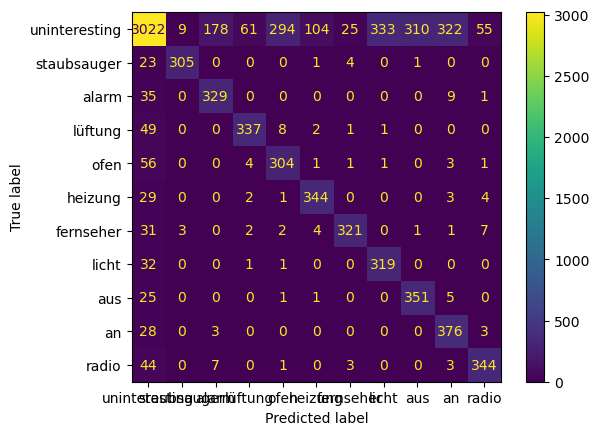

In [8]:
print(y_test[0:10])
print(y_pred[0:10])
print(np.array(list(classes.REVERSE_CLASSES.keys())))

cm = confusion_matrix(y_test, y_pred, labels=np.array(list(classes.REVERSE_CLASSES.keys())))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes.CLASSES)
disp.plot()